# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.1.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Face Recognition')
path = '.'

In [5]:
ls

 1/                                         person_rep.npy
 2/                                         pins/
'Aligned Face Dataset from Pinterest.zip'   PINS/
 emb.npy                                    vgg_face_weights.h5


### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
project_path = "/content/drive/My Drive/Face Recognition/"

In [0]:
from zipfile import ZipFile

with ZipFile(project_path+'Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

[[[233 188 165]
  [231 186 163]
  [220 178 156]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 [[232 187 164]
  [233 188 165]
  [220 178 156]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 [[230 186 161]
  [228 184 159]
  [206 164 140]
  ...
  [106  63  72]
  [106  63  72]
  [106  63  72]]

 ...

 [[198 118  91]
  [197 120  94]
  [195 119  95]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]

 [[200 120  93]
  [200 120  93]
  [198 121  95]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]

 [[201 121  94]
  [201 121  94]
  [199 122  96]
  ...
  [ 78  66  76]
  [ 78  66  76]
  [ 78  66  76]]]


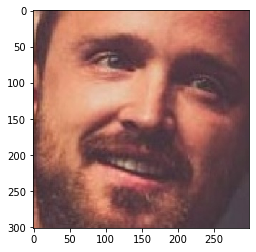

In [10]:
FirstImage = load_image(str(metadata[0]))
print(FirstImage)
from matplotlib import pyplot
pyplot.imshow(load_image(str(metadata[0])))

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)


(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [15]:
embeddings = np.zeros((metadata.shape[0],2622))

for i,m in enumerate(metadata):
  try:
    img = load_image(m.image_path())
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    print(f'Count {i}')
  except:
    pass
  

Count 0
Count 1
Count 2
Count 3
Count 4
Count 5
Count 6
Count 7
Count 8
Count 9
Count 10
Count 11
Count 12
Count 13
Count 14
Count 15
Count 16
Count 17
Count 18
Count 19
Count 20
Count 21
Count 22
Count 23
Count 24
Count 25
Count 26
Count 27
Count 28
Count 29
Count 30
Count 31
Count 32
Count 33
Count 34
Count 35
Count 36
Count 37
Count 38
Count 39
Count 40
Count 41
Count 42
Count 43
Count 44
Count 45
Count 46
Count 47
Count 48
Count 49
Count 50
Count 51
Count 52
Count 53
Count 54
Count 55
Count 56
Count 57
Count 58
Count 59
Count 60
Count 61
Count 62
Count 63
Count 64
Count 65
Count 66
Count 67
Count 68
Count 69
Count 70
Count 71
Count 72
Count 73
Count 74
Count 75
Count 76
Count 77
Count 78
Count 79
Count 80
Count 81
Count 82
Count 83
Count 84
Count 85
Count 86
Count 87
Count 88
Count 89
Count 90
Count 91
Count 92
Count 93
Count 94
Count 95
Count 96
Count 97
Count 98
Count 99
Count 100
Count 101
Count 102
Count 103
Count 104
Count 105
Count 106
Count 107
Count 108
Count 109
Count 110


In [16]:
embeddings.shape

(10770, 2622)

In [0]:
#save embeddings 
np.save('emb',embeddings)

In [0]:
#load saved embeddings
embeddings = np.load('emb.npy')

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

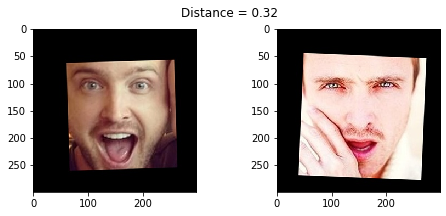

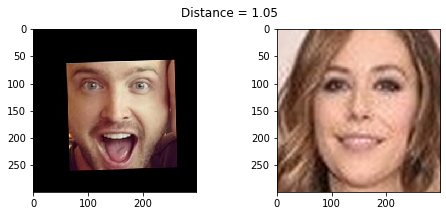

In [20]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

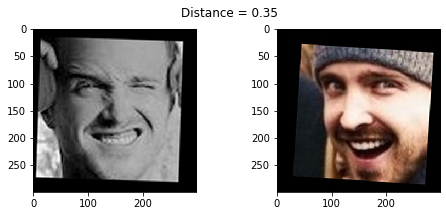

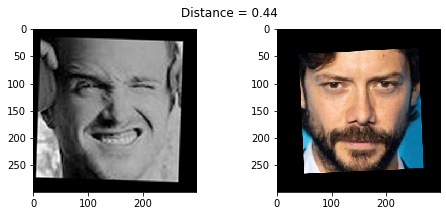

In [21]:
show_pair(30, 31)
show_pair(30, 100)

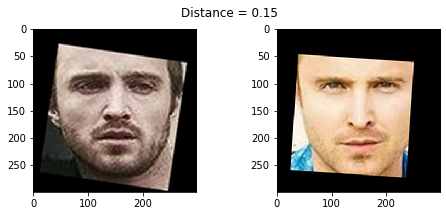

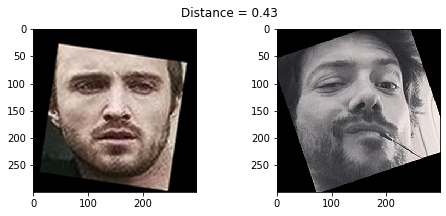

In [22]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [0]:
y_train = []
y_test = []
person_folders = os.listdir('./PINS')
for i in enumerate(person_folders):
  y_train.append(i)
  y_test.append(i)
y_train = np.array(y_train)
y_train = y_train[:,1]
y_test = np.array(y_test)
y_test = y_test[:,1]

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9573, 2622)
(1197, 2622)
(100,)
(100,)


### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
label_encoder = LabelEncoder()
y_train= label_encoder.fit_transform(y_train) 
y_test = label_encoder.fit_transform(y_test)

In [27]:
print(y_train)
print(y_test)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [49]:
import pandas as pd
from sklearn.decomposition import PCA

#### Add your code here ####
n_components = 50

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train_std)



print("Projecting the input data on the eigenfaces orthonormal basis")

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


Projecting the input data on the eigenfaces orthonormal basis


In [50]:
print(pca.explained_variance_)

[356.1982191  142.04743212 104.54137585  96.50689323  89.17166272
  81.97594279  67.73294607  61.26376926  55.12484667  50.94281854
  47.52322839  44.64467084  43.43511988  40.98503971  37.07305898
  35.79931219  34.1796579   32.3030225   30.299602    29.76249585
  28.68775669  27.70535582  25.23401456  24.50442933  23.95841871
  23.17002002  21.84067699  20.14135467  19.99298324  19.34133516
  18.33641931  17.39837885  16.58549111  16.25377493  15.00647028
  14.02903839  13.8674245   13.4538284   13.29606873  12.66571452
  11.50221004  11.3745051   10.36845634  10.31760409   9.68645988
   9.34099155   8.91641108   8.76742653   8.59140843   8.3364567 ]


In [51]:
print(pca.components_)

[[-0.02395512  0.00878048 -0.00314622 ... -0.00839085  0.02122399
   0.03893697]
 [ 0.02045292 -0.0003352   0.00868707 ... -0.02359273 -0.00362301
   0.01116204]
 [ 0.00136925  0.0009066  -0.00607419 ...  0.01117346 -0.00095809
  -0.01593477]
 ...
 [ 0.00203976 -0.01690986 -0.04023046 ... -0.03950022  0.00987074
   0.00534503]
 [ 0.03774831 -0.00347015 -0.02416274 ...  0.03181823 -0.02035617
  -0.0002721 ]
 [ 0.02905769  0.01319573  0.00126228 ... -0.00179494 -0.01415699
  -0.00504443]]


In [52]:
print(pca.explained_variance_ratio_)

[0.13583563 0.05416956 0.03986669 0.03680275 0.03400547 0.0312614
 0.02582985 0.02336284 0.02102177 0.01942696 0.01812291 0.01702517
 0.01656391 0.01562958 0.01413775 0.01365201 0.01303436 0.01231871
 0.01155471 0.01134988 0.01094003 0.01056539 0.00962295 0.00934473
 0.0091365  0.00883585 0.00832891 0.00768087 0.00762429 0.00737579
 0.00699256 0.00663484 0.00632485 0.00619835 0.00572269 0.00534995
 0.00528832 0.0051306  0.00507043 0.00483005 0.00438635 0.00433765
 0.00395399 0.0039346  0.00369392 0.00356217 0.00340026 0.00334344
 0.00327632 0.00317909]


In [53]:
X_train_pca.shape

(9573, 50)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### Add your code here ###
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1] }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)


Fitting the classifier to the training set


ValueError: ignored

In [0]:
print("Predicting people's names on the test set")

y_pred = clf.predict(X_test_pca)


print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [0]:
y_train.shape

### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf.predict(X_test_pca)
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');